Dataset3: House price Prediction Dataset

Load Data and Write script to perform following operations.

Task 1: Consider the above data and perform preprocessing. 
 

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.preprocessing import LabelEncoder

# Load dataset
data = pd.read_csv('Housing.csv')

# Step 1: Handle missing values (if any)
print("Missing values before cleaning:")
print(data.isnull().sum())  # Check for missing values

# Fill missing values in numerical columns with the mean
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns  # Select numerical columns
data[numerical_cols] = data[numerical_cols].fillna(data[numerical_cols].mean())  # Replace NaN with mean for numerical

# Fill missing values in categorical columns with the mode (most frequent value)
categorical_cols = data.select_dtypes(include=['object']).columns  # Select categorical columns
for col in categorical_cols:
    data[col] = data[col].fillna(data[col].mode()[0])  # Replace NaN with mode for categorical

label_encoder = LabelEncoder()
for col in categorical_cols:
    data[col] = label_encoder.fit_transform(data[col])
    
# Check if any missing values remain
print("\nMissing values after cleaning:")
print(data.isnull().sum())


Missing values before cleaning:
price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

Missing values after cleaning:
price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


Task 2: Perform basic EDA for data analysis.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   price             545 non-null    int64
 1   area              545 non-null    int64
 2   bedrooms          545 non-null    int64
 3   bathrooms         545 non-null    int64
 4   stories           545 non-null    int64
 5   mainroad          545 non-null    int64
 6   guestroom         545 non-null    int64
 7   basement          545 non-null    int64
 8   hotwaterheating   545 non-null    int64
 9   airconditioning   545 non-null    int64
 10  parking           545 non-null    int64
 11  prefarea          545 non-null    int64
 12  furnishingstatus  545 non-null    int64
dtypes: int64(13)
memory usage: 55.5 KB
None
              price          area    bedrooms   bathrooms     stories  \
count  5.450000e+02    545.000000  545.000000  545.000000  545.000000   
mean   4.766729e+06   5150.54

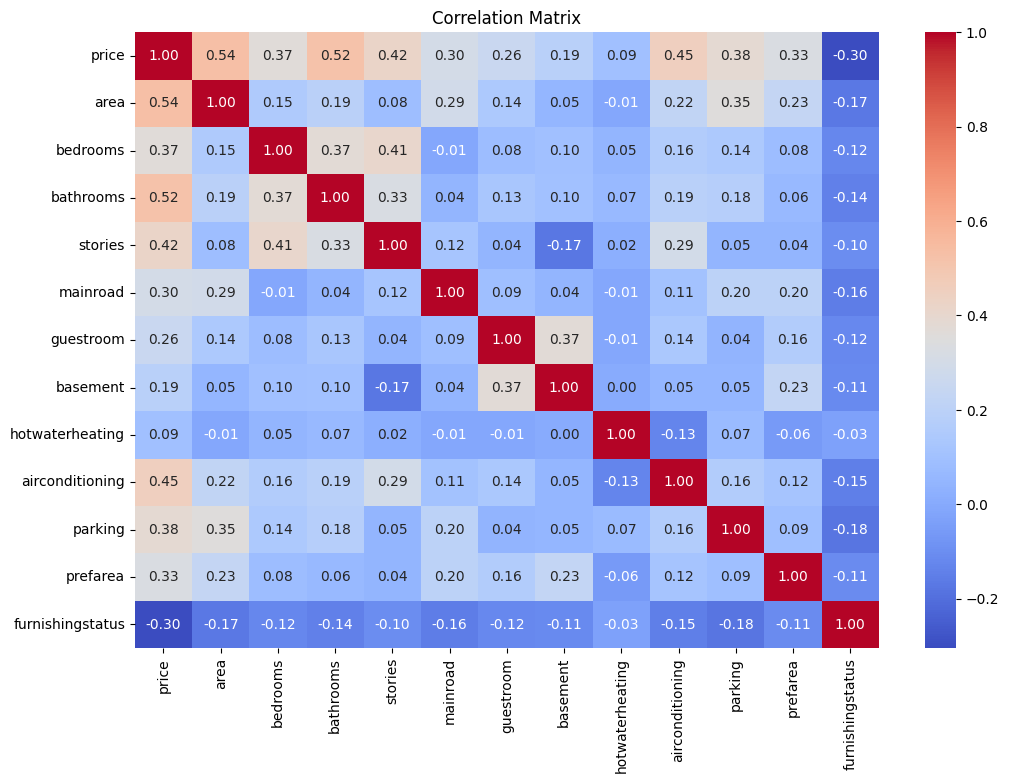

In [3]:
# Basic info and summary statistics
print(data.info())
print(data.describe())

# Visualize the correlation matrix
corr_matrix = data.corr()

# Step 4: Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()

Task 3: Perform feature engineering to select appropriate features.


In [4]:
# Select relevant features (in this case, we'll use all numerical columns)
X = data.drop('price', axis=1)  # All columns except the target variable
y = data['price']  # The target variable (selling_price)

# Split data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shape of training and testing sets
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(436, 12) (109, 12) (436,) (109,)


Task 4: Construct multiple linear regression model


In [5]:
# Initialize the linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Predict on the test data
y_pred = model.predict(X_test)

# Display model coefficients and intercept
print("Model coefficients:", model.coef_)
print("Model intercept:", model.intercept_)


Model coefficients: [ 2.35848772e+02  7.85744924e+04  1.09711727e+06  4.06223164e+05
  3.66824192e+05  2.33146766e+05  3.93159779e+05  6.87881311e+05
  7.85550579e+05  2.25756514e+05  6.29901661e+05 -2.10397118e+05]
Model intercept: 293083.06915066857


Task 5: Evaluate the model with appropriate metrics


MAE: 979679.6912959905
R²: 0.6494754192267804
MSE: 1771751116594.0344
RMSE: 1331071.4167895103


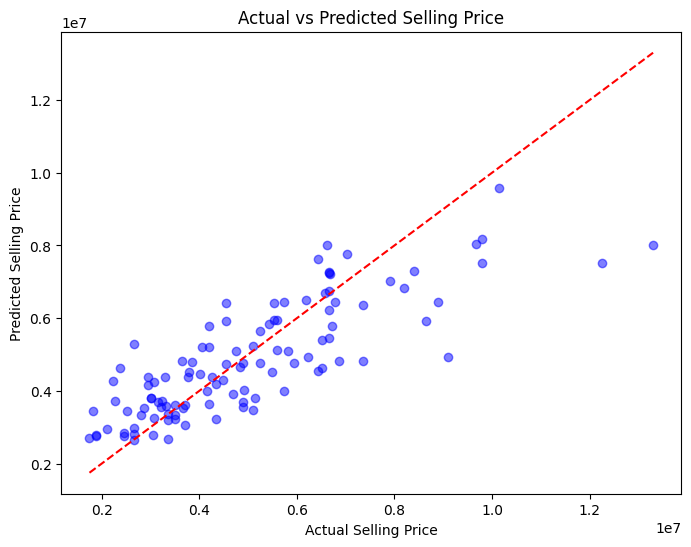

In [6]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Actual values (y_test) and predicted values (y_pred)
# y_test = actual values
# y_pred = predicted values from your model

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Calculate R-squared (R²)
r2 = r2_score(y_test, y_pred)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate RMSE
rmse = np.sqrt(mse)

# Print the errors and R²
print(f'MAE: {mae}')
print(f'R²: {r2}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')

# Plot the actual vs predicted selling prices
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Diagonal line
plt.xlabel('Actual Selling Price')
plt.ylabel('Predicted Selling Price')
plt.title('Actual vs Predicted Selling Price')
plt.show()



Task 6: Generate the results

In [8]:
# Print the results
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R²): {r2}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

Mean Absolute Error (MAE): 979679.6912959905
R-squared (R²): 0.6494754192267804
Root Mean Squared Error (RMSE): 1331071.42
